### Import Dataset

In [0]:
# Update Keras for Compatibility with Tensorflow 2
!pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [0]:
# Clone repository for converting to MNIST format
!git clone https://github.com/davidflanagan/notMNIST-to-MNIST.git

fatal: destination path 'notMNIST-to-MNIST' already exists and is not an empty directory.


In [0]:
# Open cloned folder
cd notMNIST-to-MNIST

/content/notMNIST-to-MNIST


In [0]:
# Download dataset
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz

--2020-04-07 15:25:55--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8458043 (8.1M) [application/x-gzip]
Saving to: ‘notMNIST_small.tar.gz’

notMNIST_small.tar. 100%[===================>]   8.07M  33.1MB/s    in 0.2s    

2020-04-07 15:25:55 (33.1 MB/s) - ‘notMNIST_small.tar.gz’ saved [8458043/8458043]



In [0]:
# Unpack dataset
!tar -xf notMNIST_small.tar.gz

In [0]:
ls

convert_to_mnist_format.py  notMNIST_large.tar.gz  t10k-images-idx3-ubyte.gz
data/                       notMNIST_small/        t10k-labels-idx1-ubyte.gz
LICENSE                     notMNIST_small.tar.gz  train-images-idx3-ubyte.gz
notMNIST_large/             README.md              train-labels-idx1-ubyte.gz


In [0]:
ls data/

ls: cannot access 'data/': No such file or directory


In [0]:
!python convert_to_mnist_format.py notMNIST_small 1000 data/t10k-labels-idx1-uyte data/t10k-images-idx3-ubyte

python3: can't open file 'convert_to_mnist_format.py': [Errno 2] No such file or directory


### Create Int to Label List

In [0]:
int_to_label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [0]:
int_to_label[9]

'J'

### Import and Visualize Data

In [0]:
from mlxtend.data import loadlocal_mnist

In [0]:
X, y = loadlocal_mnist(
        images_path='./data/t10k-images-idx3-ubyte', 
        labels_path='./data/t10k-labels-idx1-uyte')

In [0]:
X[0].shape

(784,)

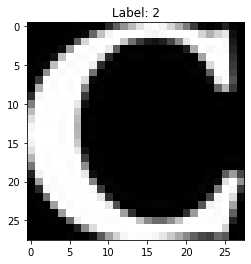

In [0]:
import matplotlib.pyplot as plt

# Index to be visualized
IDX = 3
img = X[IDX].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title("Label: {}".format(y[IDX]))
plt.show()

In [0]:
y.min()

0

In [0]:
y.max()

9

### Train/Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=0)

### Train Model

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
clf = LogisticRegression(random_state=0)

In [0]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

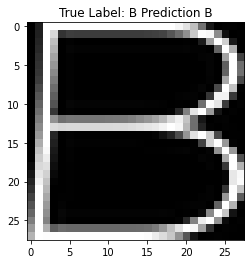

In [0]:
IDX = 12
img = X_test[IDX].reshape(28,28)
plt.imshow(img, cmap='gray')
true_label = int_to_label[y_test[IDX]]
pred_label = int_to_label[clf.predict([X_test[IDX]])[0]]
plt.title("True Label: {} Prediction {}".format(true_label, pred_label))
plt.show()

### Evaluate Model

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = clf.predict(X_test); y_pred

array([0, 9, 2, ..., 3, 6, 2], dtype=uint8)

In [0]:
y_test

array([0, 9, 2, ..., 3, 6, 2], dtype=uint8)

In [0]:
y_pred_train = clf.predict(X_train)

In [0]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred)
print(f'Accuracy in the Training set {acc_train*100:.2f}%')
print(f'Accuracy in the Test set {acc_test*100:.2f}%')

Accuracy in the Training set 96.63%
Accuracy in the Test set 85.44%


In [0]:
# Summarizing in 3 lines of code
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8544

### Keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential([
                    Dense(units=10, activation='softmax', input_shape=(X_train.shape[1],))
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [0]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
7500/7500 [==============================] - 0s 40us/step - loss: 20.4463
Epoch 2/20
7500/7500 [==============================] - 0s 37us/step - loss: 18.7112
Epoch 3/20
7500/7500 [==============================] - 0s 37us/step - loss: 16.2296
Epoch 4/20
7500/7500 [==============================] - 0s 40us/step - loss: 15.1457
Epoch 5/20
7500/7500 [==============================] - 0s 36us/step - loss: 15.4240
Epoch 6/20
7500/7500 [==============================] - 0s 36us/step - loss: 14.2016
Epoch 7/20
7500/7500 [==============================] - 0s 36us/step - loss: 12.8418
Epoch 8/20
7500/7500 [==============================] - 0s 35us/step - loss: 13.5334
Epoch 9/20
7500/7500 [==============================] - 0s 36us/step - loss: 12.3828
Epoch 10/20
7500/7500 [==============================] - 0s 37us/step - loss: 11.0913
Epoch 11/20
7500/7500 [==============================] - 0s 35us/step - loss: 11.8708
Epoch 12/20
7500/7500 [==============================] - 0s 36u

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
acc_test = accuracy_score(y_test, y_pred)
print(f'Accuracy in the Test set {acc_test*100:.2f}%')

Accuracy in the Test set 84.20%
